In [1]:
import sys
sys.path.append("../")
import os
import utilssphering
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
match_rep_df = pd.read_csv("../checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,False,0.269727,53.333333,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.320855,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,False,0.329074,45.555556,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.389170,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,False,0.628379,20.000000,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",6.976744,0.772160,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567
359,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,False,0.666818,21.111111,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",9.302326,0.790813,452567
360,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_40x,Confocal,9,4.0,1,40,6,...,0.080201,True,0.193787,53.333333,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.234702,116595


Index(['feature', 'pvalue'], dtype='object')
Index(['feature', 'pvalue'], dtype='object')
Index(['feature', 'pvalue'], dtype='object')
Index(['feature', 'pvalue'], dtype='object')


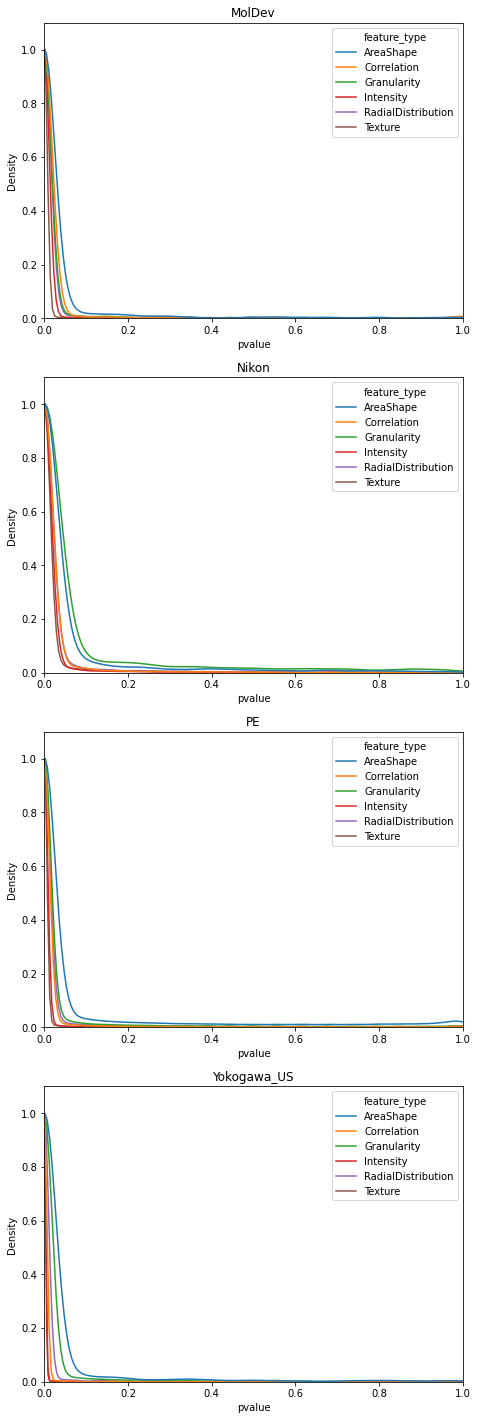

In [5]:
# Create plots for non-pixel size separated pvalues

data_dir = "../data"

comparison_paths = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files if file.endswith("all_plate_comparison.csv") and "Yokogawa_Japan" not in file]

comparison_paths.sort()

fig, ax = plt.subplots(len(comparison_paths), figsize=(7.5, 25))

for i, pth in enumerate(comparison_paths):
    vendor_name = pth.split("/")[-1].split("_")[0]
    if vendor_name == "Yokogawa":
        vendor_name = vendor_name + "_" + pth.split("/")[-1].split("_")[1]
    df = pd.read_csv(pth)
    df = df[df["Assay_Plate_Barcode_plate1"] != df["Assay_Plate_Barcode_plate2"]]  
    agg_df = utilssphering.aggregate_comparison_pvalues(df, match_rep_df.columns)

    # Select columns with 'float64' dtype  
    float64_cols = list(agg_df.select_dtypes(include='float64'))
    # The same code again calling the columns. Convert to float32
    agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

    kde = sns.kdeplot(
        data=agg_df, 
        x="pvalue", 
        hue="feature_type", 
        ax=ax[i], 
        # log_scale=[False, True]
        )
    
    # Normalize
    for line in kde.lines:
        y = line.get_data()[1]
        line.set_data(line.get_data()[0], y / y.max())

    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 1.1)
    ax[i].set_title(vendor_name)

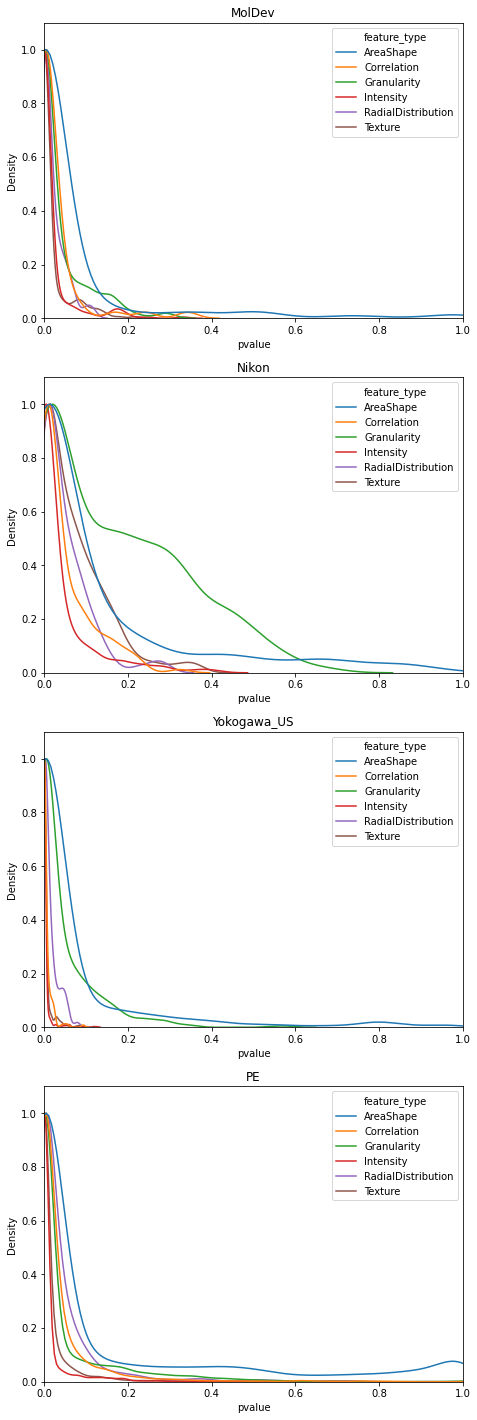

In [3]:
data_dir = "../data"

comparison_paths = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files if file.endswith("all_plate_comparison_exclude_different_mag_binning_comparison.csv") and "Yokogawa_Japan" not in file]

fig, ax = plt.subplots(len(comparison_paths), figsize=(7.5, 25))

for i, pth in enumerate(comparison_paths):
    vendor_name = pth.split("/")[-1].split("_")[0]
    if vendor_name == "Yokogawa":
        vendor_name = vendor_name + "_" + pth.split("/")[-1].split("_")[1]
    df = pd.read_csv(pth)

    df = df[df["Assay_Plate_Barcode_plate1"] != df["Assay_Plate_Barcode_plate2"]]   
    agg_df = utilssphering.aggregate_comparison_pvalues(df, match_rep_df.columns, aggregate_rows=False, aggregate_similar_features=True)

    # Select columns with 'float64' dtype  
    float64_cols = list(agg_df.select_dtypes(include='float64'))
    # The same code again calling the columns. Convert to float32
    agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

    kde = sns.kdeplot(
        data=agg_df, 
        x="pvalue", 
        hue="feature_type", 
        ax=ax[i], 
        # bw_method="silverman"
        # log_scale=[False, True]
        )
    
    # Normalize
    for line in kde.lines:
        y = line.get_data()[1]
        line.set_data(line.get_data()[0], y / y.max())

    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 1.1)
    ax[i].set_title(vendor_name)

/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Yokogawa_US')

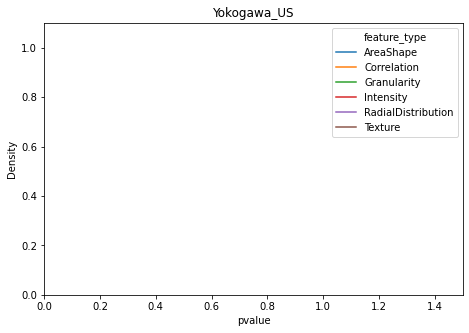

In [96]:
data_dir = "../data"

plot_df = pd.read_csv(os.path.join(data_dir, "Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison_exclude_simultaneous_excitation.csv"))

# Remove simultaneous excitation 4x
sim_ext_cols = [col for col in plot_df.columns if "simultaneous" in col]
drop = plot_df[plot_df[sim_ext_cols].eq(2)].any(axis=1)
plot_df = plot_df.loc[~drop]

drop = plot_df[plot_df[sim_ext_cols].eq(1)].any(axis=1)
plot_df = plot_df.loc[~drop]

fig, ax = plt.subplots(figsize=(7.5, 5))

vendor_name = "Yokogawa_US"

agg_df = utilssphering.aggregate_comparison_pvalues(plot_df, match_rep_df.columns)

# Select columns with 'float64' dtype  
float64_cols = list(agg_df.select_dtypes(include='float64'))
# The same code again calling the columns. Convert to float32
agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

kde = sns.kdeplot(
    data=agg_df, 
    x="pvalue", 
    hue="feature_type", 
    ax=ax, 
    )

# Normalize
for line in kde.lines:
    y = line.get_data()[1]
    line.set_data(line.get_data()[0], y / y.max())

ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.1)
ax.set_title(vendor_name)



Index(['feature', 'pvalue'], dtype='object')


Text(0.5, 1.0, 'Yokogawa_US')

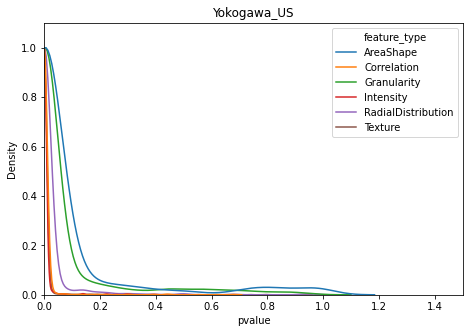

In [115]:
def aggregate_comparison_pvalues(df: pd.DataFrame, remove_cols: list):
    # Remove columns that are in remove cols and also only keep columns that are pvalues
    df = df.loc[:, (~df.columns.str.startswith(tuple(remove_cols))) & (df.columns.str.contains("_pvalue"))]
    # Drop Location, Number, Parent and Neighbour features
    df = df.loc[:, ~(df.columns.str.contains("|".join(["Location", "Number", "Parent", "Neighbors", "Children"])))]
    # Across all rows, and thus 
    # df = df.mean(axis=0).to_frame().T.melt(var_name="feature", value_name="pvalue")
    df = df.melt(var_name="feature", value_name="pvalue")
    print(df.columns)
    df["feature_type"] = df["feature"].str.split("_").str[1]
    return df


# aggregate_comparison_pvalues(plot_df, match_rep_df.columns)


data_dir = "../data"

plot_df = pd.read_csv(os.path.join(data_dir, "Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison_exclude_simultaneous_excitation.csv"))

# Remove simultaneous excitation 4x
# sim_ext_cols = [col for col in plot_df.columns if "simultaneous" in col]
# drop = plot_df[plot_df[sim_ext_cols].eq(4)].any(axis=1)
# plot_df = plot_df.loc[~drop]

plot_df = plot_df[plot_df["Assay_Plate_Barcode_plate1"] != plot_df["Assay_Plate_Barcode_plate2"]]

# drop = plot_df[plot_df[sim_ext_cols].eq(1)].any(axis=1)
# plot_df = plot_df.loc[~drop]

fig, ax = plt.subplots(figsize=(7.5, 5))

vendor_name = "Yokogawa_US"

agg_df = aggregate_comparison_pvalues(plot_df, match_rep_df.columns)

# Select columns with 'float64' dtype  
float64_cols = list(agg_df.select_dtypes(include='float64'))
# The same code again calling the columns. Convert to float32
agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

kde = sns.kdeplot(
    data=agg_df, 
    x="pvalue", 
    hue="feature_type", 
    ax=ax, 
    )

# Normalize
for line in kde.lines:
    y = line.get_data()[1]
    line.set_data(line.get_data()[0], y / y.max())

ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.1)
ax.set_title(vendor_name)



In [95]:
t = plot_df.columns[plot_df.columns.str.contains("simul")]

plot_df[t]



,simultaneous-excitation_plate1,simultaneous-excitation_plate2
7,4.0,4.0
9,4.0,4.0


In [84]:


# subset_df = df[df[column_list].eq(desired_value).all(axis=1)]
# subset_df = df.loc[subset_df.index]
# df[df[column_list].eq(desired_value).all(axis=1)]
# sim_ext_cols

['simultaneous-excitation_plate1', 'simultaneous-excitation_plate2']


,Vendor_plate1,Batch_plate1,Plate_Map_Name_plate1,Assay_Plate_Barcode_plate1,Modality_plate1,Images_per_well_plate1,Sites-SubSampled_plate1,Binning_plate1,Magnification_plate1,Number_of_channels_plate1,...,Nuclei_Texture_Variance_RNA_20_03_256_kstest_statistic,Nuclei_Texture_Variance_RNA_20_03_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_00_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_00_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_01_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_01_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_02_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_02_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_03_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_03_256_kstest_pvalue
0,Yokogawa_US,Scope1_Yokogawa_US_10X,JUMP-MOA_compound_platemap,BRO0117014_10x,Confocal,4,NaN,1,10,6,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
1,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117033_20xb,Confocal,9,NaN,1,20,5,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
2,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117033_20xb,Confocal,9,NaN,1,20,5,...,0.315104,3.017098e-17,0.247396,1.002132e-10,0.242188,2.718927e-10,0.247396,1.002132e-10,0.239583,4.441534e-10
3,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117033_20xb,Confocal,9,NaN,1,20,5,...,0.458333,9.464484e-37,0.414062,7.427409e-30,0.403646,2.384091e-28,0.416667,3.071998e-30,0.406250,1.011031e-28
4,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,NaN,1,20,5,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
5,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,NaN,1,20,5,...,0.325521,2.126769e-18,0.356771,4.249574e-22,0.361979,9.458130e-23,0.361979,9.458130e-23,0.359375,2.010814e-22
6,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,NaN,1,20,5,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
8,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,NaN,1,20,6,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00


In [46]:
df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/MolDev_all_plate_comparison.csv")
setting_cols = [col for col in df.columns if "_plate" in col]
setting_df = df[setting_cols]
df

,Vendor_plate1,Batch_plate1,Plate_Map_Name_plate1,Assay_Plate_Barcode_plate1,Modality_plate1,Images_per_well_plate1,Sites-SubSampled_plate1,Binning_plate1,Magnification_plate1,Number_of_channels_plate1,...,Nuclei_Texture_Variance_RNA_20_03_256_kstest_statistic,Nuclei_Texture_Variance_RNA_20_03_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_00_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_00_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_01_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_01_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_02_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_02_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_03_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_03_256_kstest_pvalue
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.666667,3.287277e-81,0.661458,8.016487e-80,0.661458,8.016487e-80,0.661458,8.016487e-80,0.661458,8.016487e-80
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.796875,7.882975e-122,0.796875,7.882975e-122,0.796875,7.882975e-122,0.796875,7.882975e-122,0.796875,7.882975e-122
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.786458,4.219759e-118,0.783854,3.487656e-117,0.783854,3.487656e-117,0.783854,3.487656e-117,0.783854,3.487656e-117
4,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.765625,6.355945e-111,0.760417,3.484731e-109,0.757812,2.532987e-108,0.760417,3.484731e-109,0.757812,2.532987e-108
5,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.778646,2.288665e-115,0.781250,2.844101e-116,0.778646,2.288665e-115,0.781250,2.844101e-116,0.778646,2.288665e-115
6,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
7,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.398438,1.301230e-27,0.398438,1.301230e-27,0.398438,1.301230e-27,0.398438,1.301230e-27,0.398438,1.301230e-27
8,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.528646,2.032931e-49,0.528646,2.032931e-49,0.528646,2.032931e-49,0.531250,6.257831e-50,0.531250,6.257831e-50
9,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.231771,1.873160e-09,0.244792,1.655246e-10,0.239583,4.441534e-10,0.244792,1.655246e-10,0.239583,4.441534e-10


In [25]:
# Find compartment pvalues 

# 1. Iterate over compartments
# 2. Subset dataset to just features of that compartment
# 3. Find features that match on the first three meausrement names and mean aggregate them
# 4. Add these new features to a separate dataframe

df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/MolDev_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/Nikon_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/PE_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# Drop the kstest_statistic col
# drop_cols = [col for col in df.columns if "kstest_statistic" in col or "_Location_" in col or "Children" in col]
drop_cols = df.columns[df.columns.str.contains("kstest_statistic|_Location_|Children|Parent|Number_Object")]

df = df.drop(columns=drop_cols)

compartments = ["Nuclei", "Cytoplasm", "Cells"]

result_df = pd.DataFrame()

for compart in compartments:
    subset_cols = [col for col in df.columns if compart in col]
    sub_df = df[subset_cols]
    # print(sub_df.columns)

    # Find the first 3 words of column names that will be used for grouping
    group_words = [col.split("_")[:3] for col in subset_cols]
    # Join them back
    group_words = ["_".join(w) for w in group_words]

    # Find the mean for the feature groups
    result_df = pd.concat([result_df, sub_df.groupby(group_words, axis=1).mean().mean(axis=0).reset_index()])

result_df = result_df.rename(columns={"index": "Feature", 0: "pvalue"})

    # Join settings if you want
    # result = setting_df.join(result)



In [26]:
sorted = result_df.sort_values(by="pvalue")

# sorted
# print(len(sorted))
sorted[:10]
# sorted[-10:]

,Feature,pvalue
8,Cells_AreaShape_EulerNumber,0.500000
15,Nuclei_AreaShape_MedianRadius,0.500000
9,Cells_AreaShape_Extent,0.500000
62,Cells_Neighbors_NumberOfNeighbors,0.500000
13,Nuclei_AreaShape_MaximumRadius,0.500000
16,Nuclei_AreaShape_MinFeretDiameter,0.500000
14,Nuclei_AreaShape_MeanRadius,0.500000
17,Nuclei_AreaShape_MinorAxisLength,0.500000
48,Cytoplasm_Intensity_MassDisplacement,0.500001
7,Nuclei_AreaShape_EquivalentDiameter,0.500001


In [21]:
# Find compartment pvalues 

# 1. Iterate over compartments
# 2. Subset dataset to just features of that compartment
# 3. Find features that match on the first three meausrement names and mean aggregate them
# 4. Add these new features to a separate dataframe

df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/MolDev_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/Nikon_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/PE_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# Drop the kstest_statistic col
# drop_cols = [col for col in df.columns if "kstest_statistic" in col or "_Location_" in col or "Children" in col]
drop_cols = df.columns[df.columns.str.contains("kstest_statistic|_Location_|Children|Parent|Number_Object")]

df = df.drop(columns=drop_cols)

compartments = ["Nuclei", "Cytoplasm", "Cells"]

result_df = pd.DataFrame()

for compart in compartments:
    subset_cols = [col for col in df.columns if compart in col]
    sub_df = df[subset_cols]
    # print(sub_df.columns)

    # Find the first 3 words of column names that will be used for grouping
    group_words = [col.split("_")[:3] for col in subset_cols]
    # Join them back
    group_words = ["_".join(w) for w in group_words]

    # Find the mean for the feature groups
    # result_df = pd.concat([result_df, sub_df.groupby(group_words, axis=1).mean().reset_index()])
    result_df = result_df.join(sub_df.groupby(group_words, axis=1).mean(), how="right")

# result_df = result_df.rename(columns={"index": "Feature", 0: "pvalue"})

    # Join settings if you want
    # result = setting_df.join(result)

result_df

,Nuclei_AreaShape_Area,Nuclei_AreaShape_BoundingBoxArea,Nuclei_AreaShape_BoundingBoxMaximum,Nuclei_AreaShape_BoundingBoxMinimum,Nuclei_AreaShape_Center,Nuclei_AreaShape_Compactness,Nuclei_AreaShape_Eccentricity,Nuclei_AreaShape_EquivalentDiameter,Nuclei_AreaShape_EulerNumber,Nuclei_AreaShape_Extent,...,Cells_Texture_DifferenceEntropy,Cells_Texture_DifferenceVariance,Cells_Texture_Entropy,Cells_Texture_InfoMeas1,Cells_Texture_InfoMeas2,Cells_Texture_InverseDifferenceMoment,Cells_Texture_SumAverage,Cells_Texture_SumEntropy,Cells_Texture_SumVariance,Cells_Texture_Variance
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.163829e-68,8.922081e-74,1.439373e-08,5.226178e-08,1.438163e-08,4.391966e-12,2.032931e-49,4.008564e-73,5.575397e-04,5.438456e-06,...,5.846950e-16,6.214287e-15,2.341779e-15,3.559092e-30,6.615642e-23,5.524774e-10,1.072411e-08,1.306063e-16,1.942423e-15,7.491086e-15
2,1.942893e-102,2.904174e-103,3.416618e-08,8.793918e-07,1.810012e-07,1.864384e-21,2.384091e-28,5.433336e-100,4.690318e-35,8.713717e-05,...,8.466592e-07,7.066446e-12,6.914525e-06,2.972473e-17,3.373120e-10,9.732053e-03,2.872752e-02,1.301150e-06,3.023216e-08,3.081058e-07
3,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
4,5.328423e-33,1.262619e-30,3.178985e-01,3.660588e-01,3.768614e-01,1.203194e-04,1.655246e-10,8.181783e-34,6.556760e-49,5.547665e-01,...,3.529895e-07,6.656175e-06,4.190977e-08,2.469268e-05,9.561925e-03,2.029209e-07,5.946429e-06,5.218885e-08,1.749553e-05,1.423761e-05
5,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
6,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,1.574115e-13,1.873160e-09,1.647547e-04,2.814891e-04,1.590116e-04,5.328423e-33,5.453166e-19,1.097644e-16,5.653725e-02,8.181783e-34,...,2.857837e-53,1.753562e-71,1.964004e-59,1.910427e-05,5.490329e-54,4.027339e-56,4.051074e-37,4.382221e-59,1.892152e-51,1.892152e-51
8,1.847621e-08,1.194281e-06,8.193241e-02,5.894277e-02,9.610202e-02,2.946169e-03,9.852968e-02,7.518559e-09,7.456458e-04,1.194281e-06,...,3.343524e-02,4.167788e-02,9.127142e-02,9.131178e-02,1.472910e-01,4.429797e-02,1.334224e-01,7.723528e-02,6.309563e-02,5.763213e-02
9,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
